# Artifact Removal
Various types of artifacts were found on breast mammogram images, as shown below.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from bcd.dal.image import ImageRepo
from bcd.preprocess.threshold import ThresholdTriangle, ThresholdManual
from bcd.utils.image import grayscale

## Image Visualizer

In [2]:
def plot(img):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    _ = ax.imshow(img, cmap='gray',  aspect='auto')


## Get Image

In [3]:
mmg_id = "Mass-Training_P_01641_LEFT_CC"
condition = lambda x: x["mmg_id"] == mmg_id
repo = ImageRepo()
meta = repo.query(condition=condition)
img = repo.get(meta['filepath'])


## Visualize Image

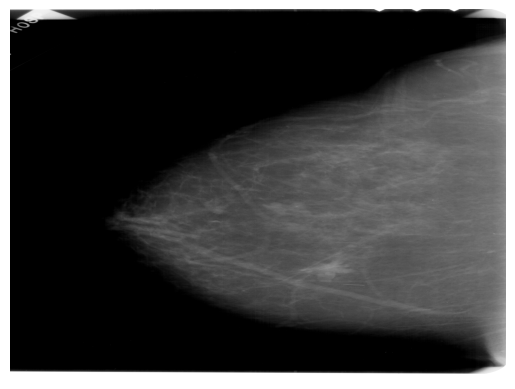

In [4]:
plot(img=img)

## Grayscale

In [5]:
img = grayscale(img)

## Binary Masking

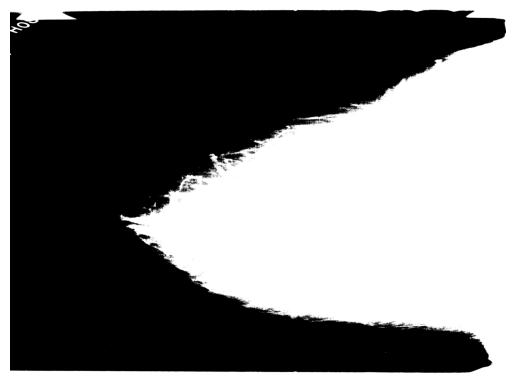

In [6]:
binarizer = ThresholdManual(threshold=0.2)
threshold, image_bin = binarizer.run(image=img)
plot(image_bin)

## Find Countours

3663


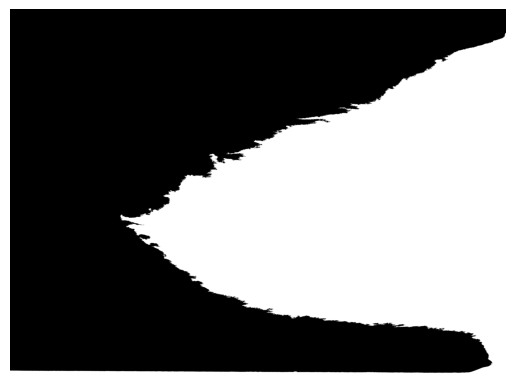

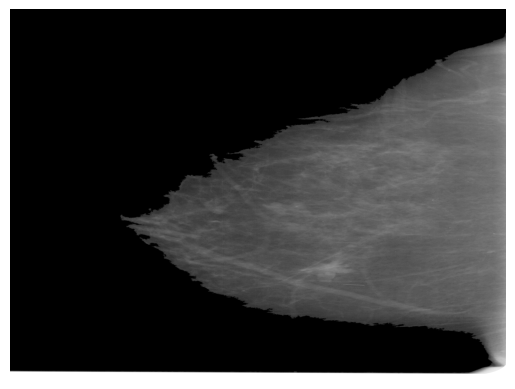

In [7]:
# Extract contours using border following algorithm
contours, _ = cv2.findContours(
    image=image_bin.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE
)
# Compute areas for the contours, and obtain index
# for largest contour
contour_areas = [cv2.contourArea(contour) for contour in contours]
idx = np.argmax(contour_areas)
print(idx)

# Create a breast mask and apply it to the original image
mask = cv2.drawContours(
    np.zeros_like(image_bin),
    contours=contours,
    contourIdx=idx,
    color=255,
    thickness=-1,
)
plot(mask)
image_seg = cv2.bitwise_and(img, img, mask=mask)
plot(image_seg)